### 
- Develop a simple model using Tensorflow
- Given the wine dataset, we're trying to predict the quality of the wine, we shall use regression modelling since thne feature quality it's a contious value

In [1]:
import pandas as pd
import seaborn as sns

from tensorflow import keras
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  MinMaxScaler, StandardScaler

import warnings
warnings.filterwarnings("ignore")

2024-03-15 07:56:19.508587: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-15 07:56:19.536871: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-15 07:56:19.536895: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-15 07:56:19.537513: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-15 07:56:19.541321: I tensorflow/core/platform/cpu_feature_guar

In [2]:
df = pd.read_csv('data/red-wine.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Why transforming the features?

Transforming features in a neural network, such as scaling them to a minimum-maximum range or normalizing them, serves several purposes:

**`Improved Convergence:`** Neural networks often converge faster when input features are scaled or normalized. This is because feature scaling can prevent some features from dominating others in terms of their influence on the model's weights and biases during training.

**`Better Gradient Descent Performance:`** Scaling or normalizing features can lead to a more regularized optimization landscape, making gradient descent algorithms more efficient and effective.

**`Enhanced Model Interpretability:`** In some cases, scaling or normalizing features can improve the interpretability of the model's coefficients or weights, making it easier to understand the importance of each feature in the prediction process.

**`Stabilized Model Training:`** Normalizing or scaling features can help stabilize the training process, making it less sensitive to the scale of input features and reducing the likelihood of numerical instability issues during training.

As for choosing the appropriate transformation method, it depends on the nature of the data and the specific requirements of the problem at hand. Here are some common methods:

**`Min-Max Scaling (Normalization):`** This method scales the features to a fixed range, typically between 0 and 1. It is suitable when the distribution of the features does not follow a Gaussian (normal) distribution and when the outliers are not a concern.

**`Standardization (Z-score Normalization):`** This method transforms the features to have a mean of 0 and a standard deviation of 1. It is suitable when the features follow a Gaussian distribution, and it is less sensitive to outliers compared to min-max scaling.

**`Robust Scaling:`** This method scales the features using statistics that are robust to outliers, such as the median and the interquartile range. It is suitable when the data contains outliers that could skew the scaling using other methods.

**`Log Transformation:`** This method transforms the features using the natural logarithm function. It is suitable for data that is skewed and/or heavily right-skewed.

`**Box-Cox Transformation:**` This is a family of power transformations that includes the logarithm as a special case. It is suitable for data that does not follow a normal distribution.

**`Quantile Transformation:`** This method transforms the features to follow a uniform or normal distribution. It is suitable when the distribution of the features deviates significantly from a Gaussian distribution.

The choice of transformation method should be guided by the characteristics of the data and the specific requirements of the modeling task. It is often beneficial to experiment with different methods and evaluate their impact on the performance of the neural network model. Cross-validation or other validation techniques can be used to assess the effectiveness of different feature transformation methods.

In [3]:
# Transform the data 
min_max_scaler = MinMaxScaler()

min_max_scaler.fit(df).transform(df)
df_transformed = pd.DataFrame(data=min_max_scaler.fit(df).transform(df),
                              columns = list(min_max_scaler.get_feature_names_out()))

df_transformed.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4


In [4]:
X = df_transformed.drop(columns='quality')
y = df_transformed.quality

# Train Test Spilt
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0, train_size=.7)

In [5]:
# Number of columns, excluding target label
input_shape =  [len(df_transformed.columns)-1]
input_shape

[11]

In [6]:
# Fully Connect Neural Net
model = keras.Sequential([
    layers.Dense(units=512, activation='relu', input_shape=input_shape), # first layer for inputs/feats
    layers.Dense(units=512, activation='relu'),  # 1st hidden layer
    layers.Dense(units=512, activation='relu'),  # 2nd hidden layer
    layers.Dense(units=1), # Regression: last layer with no activation function
])

# 1) Add Loss and Optimizer

Before training the network we need to define the loss and optimizer we'll use. Using the model's `compile` method, add the Adam optimizer and MAE loss.

In [7]:
model.compile(
    optimizer='adam',
    loss='mae',
)

### How does Neural Net learns

It learns using **`backpropagation`**, short for `"backward propagation of errors,"` is a fundamental algorithm used to train artificial neural networks, including deep learning models. It's a key component of the learning process in neural networks! 

Here's a simplified explanation of how backpropagation works:

**`Forward Pass:`** During the forward pass, input data is passed through the neural network, layer by layer, to make predictions. Each layer applies a transformation to the input data using its weights and biases, producing an output.

**`Calculation of Loss:`** After the forward pass, the output of the neural network is compared to the actual target values (ground truth) to calculate the loss or error. The loss function quantifies the difference between the predicted output and the true output.

**`Backward Pass (Backpropagation):`** In this step, the algorithm calculates the gradient of the loss function with respect to the weights and biases of the neural network. It starts from the output layer and moves backward through the network, applying the chain rule of calculus to compute the partial derivatives of the loss function with respect to each parameter in each layer.

**`Updating Weights and Biases:`** Once the gradients are computed, the optimizer algorithm (e.g., stochastic gradient descent or ADAM) uses these gradients to update the weights and biases of the neural network, moving them in the direction that minimizes the loss function.

**`Iterative Process:`** Step are repeated iteratively for multiple epochs (passes through the entire dataset) until the model's performance converges to an acceptable level or until a stopping criterion is met.

Backpropagation enables neural networks to learn from data by adjusting their parameters (weights and biases) in a way that minimizes the difference between predicted and actual outputs. 

In [8]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=256,
    epochs=20,
)

Epoch 1/20
5/5 [==============================] - 1s 39ms/step - loss: 0.3061 - val_loss: 0.1295
Epoch 2/20
5/5 [==============================] - 0s 12ms/step - loss: 0.1477 - val_loss: 0.1194
Epoch 3/20
5/5 [==============================] - 0s 13ms/step - loss: 0.1306 - val_loss: 0.1135
Epoch 4/20
5/5 [==============================] - 0s 12ms/step - loss: 0.1217 - val_loss: 0.1102
Epoch 5/20
5/5 [==============================] - 0s 14ms/step - loss: 0.1127 - val_loss: 0.1116
Epoch 6/20
5/5 [==============================] - 0s 13ms/step - loss: 0.1109 - val_loss: 0.1065
Epoch 7/20
5/5 [==============================] - 0s 15ms/step - loss: 0.1094 - val_loss: 0.1044
Epoch 8/20
5/5 [==============================] - 0s 19ms/step - loss: 0.1053 - val_loss: 0.1015
Epoch 9/20
5/5 [==============================] - 0s 13ms/step - loss: 0.1032 - val_loss: 0.1039
Epoch 10/20
5/5 [==============================] - 0s 13ms/step - loss: 0.1032 - val_loss: 0.0996
Epoch 11/20
5/5 [============

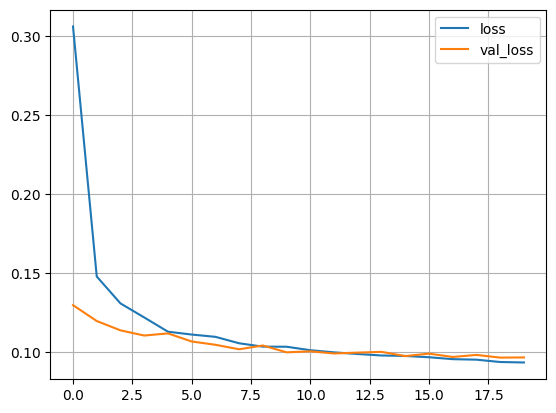

In [9]:
history_df = pd.DataFrame(history.history)
history_df['loss'].plot(grid=True, legend=True);
history_df['val_loss'].plot(grid=True, legend=True);